In [33]:
from fastai.tabular import *
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import os
import sys
import glob
import pprint
from sklearn.utils import shuffle
p = pprint.PrettyPrinter(indent=4, width=30)
pretty = p.pprint

print('libraries loaded')

libraries loaded


In [24]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-120s-layer2.csv'
#raw_data = loadarff(filepath)
df_data = pd.read_csv(filepath)
# Converting arff file into pandas dataframe
#df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
#print(df_data['class1'].value_counts())
#column_name = list(df_data.columns)
#print(column_name)


relevant libraries uploaded


In [25]:
df_data

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,116516054,116474040,116516010,918,502,41460623,41459681,9.706170e+06,9.709668e+06,0.223145,...,1.040000e+07,2882883,1.660000e+07,41798626,1.430000e+07,2551209,1.640000e+07,41459595,1.430000e+07,CHAT
1,110542890,110501911,110542850,2880,4140,34532250,34532119,3.946497e+06,4.421714e+06,0.497544,...,5.805017e+06,1412470,1.100000e+07,34872202,9.840158e+06,1412427,1.070000e+07,34532119,9.860561e+06,CHAT
2,101111380,101110992,101111380,2718,283,21385880,21385877,4.814809e+06,4.814828e+06,0.435164,...,5.359914e+06,1383632,9.158663e+06,21714802,7.757389e+06,1383578,8.864222e+06,21385830,7.606093e+06,CHAT
3,115531998,115531950,115531952,935,525,28913072,28913070,4.621278e+06,4.621278e+06,0.450092,...,5.481550e+06,1318581,7.679812e+06,29294644,8.262810e+06,1318537,7.497432e+06,28913021,8.105855e+06,CHAT
4,88160003,88159956,88159952,350915,351697,41467426,41467424,6.781535e+06,6.781535e+06,0.317604,...,8.469402e+06,1243172,1.100000e+07,41995078,1.340000e+07,1243129,1.080000e+07,41467377,1.320000e+07,CHAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,112175390,112137825,112175390,0,0,23436169,23474122,5.030858e+04,2.705629e+04,56.848476,...,4.281421e+05,3144191,7.979551e+06,23991511,6.379359e+06,1924245,6.260261e+06,23436169,6.896825e+06,VIDEO-STREAMING
482,108310089,108310028,108309767,266,112,23109705,23149104,1.775574e+06,1.641057e+06,1.191025,...,3.151198e+06,1062074,8.304668e+06,23278503,6.724147e+06,1062028,7.777931e+06,23109705,6.854361e+06,VIDEO-STREAMING
483,114369983,114369815,114369706,0,0,12603721,12643794,2.163636e+04,1.158761e+04,132.534775,...,1.487214e+05,1304039,8.132552e+06,22869638,5.632474e+06,1036177,3.765753e+06,12603721,3.171787e+06,VIDEO-STREAMING
484,119999442,119999168,119999173,262,485,16854380,16814325,2.307676e+06,2.068951e+06,0.933338,...,3.004819e+06,1660872,6.666620e+06,17326943,4.869936e+06,1129512,6.314447e+06,16814325,4.868350e+06,VIDEO-STREAMING


In [26]:
# total Tor samples
df_data['class1 '].value_counts()
df_data.dtypes

duration                int64
total_fiat              int64
total_biat              int64
min_fiat                int64
min_biat                int64
max_fiat                int64
max_biat                int64
mean_fiat             float64
mean_biat             float64
flowPktsPerSecond     float64
flowBytesPerSecond    float64
min_flowiat             int64
max_flowiat             int64
mean_flowiat          float64
std_flowiat           float64
min_active              int64
mean_active           float64
max_active              int64
std_active            float64
min_idle                int64
mean_idle             float64
max_idle                int64
std_idle              float64
class1                 object
dtype: object

In [27]:
df_dep_var = 'class1 '
#df_cat_names = ['duration', 'total_fiat', 'total_biat']
cont_names = list(set(df_data.columns) - set([df_dep_var]))

In [28]:
cont_names

['max_idle',
 'mean_biat',
 'std_active',
 'mean_active',
 'max_fiat',
 'max_active',
 'mean_fiat',
 'total_fiat',
 'mean_idle',
 'min_fiat',
 'max_biat',
 'flowPktsPerSecond',
 'min_active',
 'std_idle',
 'min_idle',
 'min_flowiat',
 'flowBytesPerSecond',
 'max_flowiat',
 'mean_flowiat',
 'duration',
 'min_biat',
 'std_flowiat',
 'total_biat']

In [34]:
procs = [FillMissing, Categorify, Normalize]
sss = StratifiedShuffleSplit(n_splits = 2, test_size=0.5, random_state=0)
print(sss)

StratifiedShuffleSplit(n_splits=2, random_state=0, test_size=0.5,
            train_size=None)


epoch,train_loss,valid_loss,accuracy,time
0,2.206460,2.068301,0.106996,00:00
1,2.177825,2.070992,0.094650,00:00
2,2.158879,2.072141,0.094650,00:00
3,2.136190,2.070359,0.098765,00:00
4,2.122174,2.064385,0.098765,00:00
5,2.099525,2.049818,0.098765,00:00
6,2.075304,2.025305,0.115226,00:00
7,2.036203,1.990095,0.127572,00:00
8,1.999063,1.942017,0.485597,00:00
9,1.965431,1.882353,0.534979,00:00


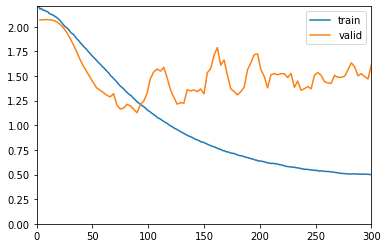

epoch,train_loss,valid_loss,accuracy,time
0,2.067012,2.165484,0.053498,00:00
1,2.037130,2.173645,0.045267,00:00
2,2.002711,2.179149,0.041152,00:00
3,1.998808,2.184302,0.041152,00:00
4,1.985164,2.178959,0.065844,00:00
5,1.965815,2.156923,0.069959,00:00
6,1.949338,2.125050,0.263374,00:00
7,1.930042,2.066321,0.436214,00:00
8,1.908389,2.018944,0.469136,00:00
9,1.878519,1.980660,0.489712,00:00


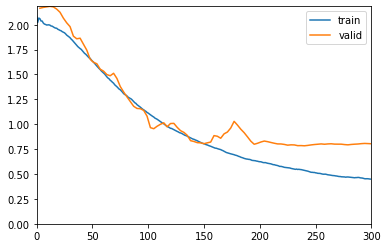

In [30]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=filepath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=100) #
    #model.save('{}.model'.format(os.path.basename(filepath)))

In [31]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.8041009306907654: accuracy: 70.78%


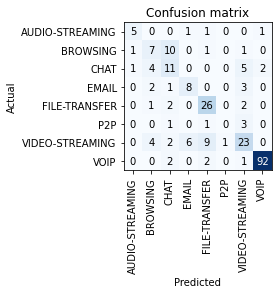

In [32]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [35]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-120s-layer2-85.csv'
#raw_data = loadarff(filepath)
df_data = pd.read_csv(filepath)
# Converting arff file into pandas dataframe
#df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
#print(df_data['class1'].value_counts())
#column_name = list(df_data.columns)
#print(column_name)


relevant libraries uploaded


In [36]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,2.092287,2.116642,0.082126,00:00
1,2.071372,2.086567,0.077295,00:00
2,1.997744,2.021152,0.454106,00:00
3,1.909842,1.932384,0.458937,00:00
4,1.831925,1.837925,0.507246,00:00
5,1.762522,1.754197,0.516908,00:00
6,1.700091,1.714476,0.536232,00:00
7,1.643209,1.689429,0.565217,00:00
8,1.598087,1.667819,0.560386,00:00
9,1.557167,1.651852,0.565217,00:00


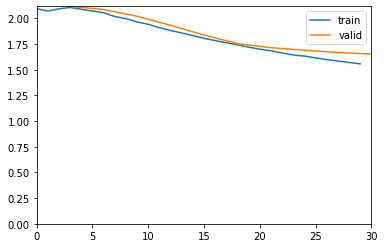

epoch,train_loss,valid_loss,accuracy,time
0,2.296377,2.469061,0.086957,00:00
1,2.262142,2.535398,0.091787,00:00
2,2.189906,2.565668,0.439614,00:00
3,2.081480,2.582748,0.463768,00:00
4,1.980608,2.572643,0.463768,00:00
5,1.890768,2.546318,0.473430,00:00
6,1.813825,2.525034,0.502415,00:00
7,1.747958,2.525041,0.531401,00:00
8,1.690596,2.533161,0.531401,00:00
9,1.645320,2.555923,0.531401,00:00


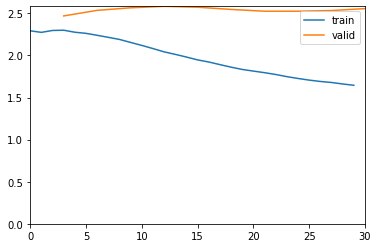

In [38]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=filepath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    #model.save('{}.model'.format(os.path.basename(filepath)))

In [39]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 2.5559234619140625: accuracy: 53.14%


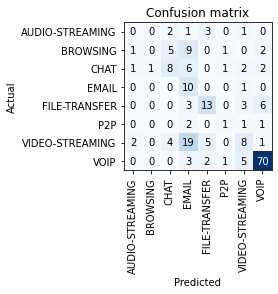

In [40]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [49]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-60s-Layer2.csv'
#raw_data = loadarff(filepath)
df_data = pd.read_csv(filepath)
# Converting arff file into pandas dataframe
#df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
#print(df_data['class1'].value_counts())
#column_name = list(df_data.columns)
#print(column_name)



relevant libraries uploaded


In [50]:
df_data

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,59990337,59990337,59951785,0,4,33903801,33942098,3.629179e+04,4.922150e+04,47.891046,...,6.358437e+05,4340268,2.200000e+07,39665882,2.500000e+07,2738693,1.830000e+07,33903801,2.200000e+07,FILE-TRANSFER
1,59977810,59906635,59977810,0,0,387745,387871,6.081274e+03,8.227409e+03,285.822373,...,1.354080e+04,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,FILE-TRANSFER
2,59973902,59918561,59949240,1,5,168947,158521,5.469018e+03,7.455446e+03,316.787792,...,1.230086e+04,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,FILE-TRANSFER
3,59990105,59990029,59964416,0,0,210165,208601,6.234674e+03,8.468354e+03,278.462590,...,1.358003e+04,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,FILE-TRANSFER
4,59972926,59935993,59934978,0,4,241296,240066,6.124041e+03,8.305845e+03,283.544611,...,1.340693e+04,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,-1,0.000000e+00,FILE-TRANSFER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,47137431,47137213,47137431,0,0,12603721,12643794,3.314853e+04,1.743893e+04,87.552502,...,2.457005e+05,2110827,6.660455e+06,14316974,3.840431e+06,1279842,4.757721e+06,12603721,3.859712e+06,VIDEO-STREAMING
932,50060823,50060645,50060554,262,485,13958964,13996130,1.726229e+06,1.614857e+06,1.238493,...,2.491863e+06,1702389,6.226512e+06,13995839,4.416125e+06,1129512,5.837055e+06,13958964,4.473272e+06,VIDEO-STREAMING
933,57734728,57734728,57733918,1219,1269,16854380,16814325,1.924491e+06,1.698056e+06,1.143159,...,2.743748e+06,1660872,6.295098e+06,17326943,5.205134e+06,1659508,5.964572e+06,16814325,5.140097e+06,VIDEO-STREAMING
934,57491199,57491058,57491199,26,3,9819311,9860130,2.105900e+05,1.440882e+05,11.723534,...,5.227630e+05,1111065,4.232471e+06,10075198,2.926262e+06,1073037,3.114891e+06,9819311,2.424594e+06,VIDEO-STREAMING


In [51]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,2.237989,2.214229,0.094017,00:00
1,2.127964,2.162894,0.076923,00:00
2,1.966710,1.914769,0.525641,00:00
3,1.818189,1.694923,0.553419,00:00
4,1.677274,1.608134,0.576923,00:00
5,1.555888,1.559519,0.606838,00:00
6,1.463112,1.517925,0.613248,00:00
7,1.382872,1.559321,0.615385,00:00
8,1.315610,1.590687,0.617521,00:00
9,1.261634,1.590125,0.613248,00:00


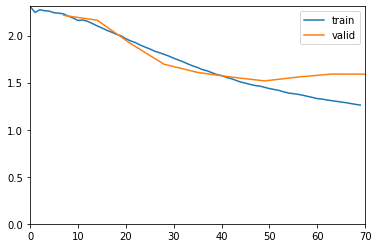

epoch,train_loss,valid_loss,accuracy,time
0,2.215951,2.190340,0.025641,00:00
1,2.109078,2.142534,0.064103,00:00
2,1.963796,1.935199,0.438034,00:00
3,1.812677,1.737048,0.495726,00:00
4,1.686422,1.594419,0.517094,00:00
5,1.579772,1.613092,0.559829,00:00
6,1.491571,1.637580,0.589744,00:00
7,1.409958,1.678186,0.596154,00:00
8,1.346938,1.719197,0.591880,00:00
9,1.300256,1.728433,0.587607,00:00


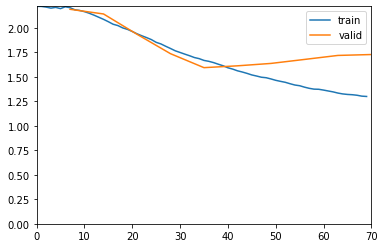

In [52]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=filepath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    #model.save('{}.model'.format(os.path.basename(filepath)))

In [53]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 1.7284332513809204: accuracy: 58.76%


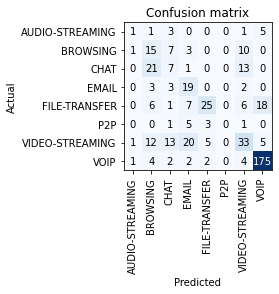

In [54]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [84]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-30s-Layer2.csv'
#raw_data = loadarff(filepath)
df_data = pd.read_csv(filepath)
# Converting arff file into pandas dataframe
#df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
#print(df_data['class1'].value_counts())
#column_name = list(df_data.columns)
#print(column_name)


relevant libraries uploaded


In [85]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,2.071970,1.996711,0.421286,00:00
1,1.861879,1.767949,0.557650,00:00
2,1.640789,1.493182,0.619734,00:00
3,1.449694,1.600073,0.629712,00:00
4,1.301893,1.395089,0.665188,00:00
5,1.190099,1.266312,0.652993,00:00
6,1.096397,1.238642,0.662971,00:00
7,1.039537,1.362822,0.672949,00:00
8,0.990922,1.321837,0.672949,00:00
9,0.954804,1.343269,0.671840,00:00


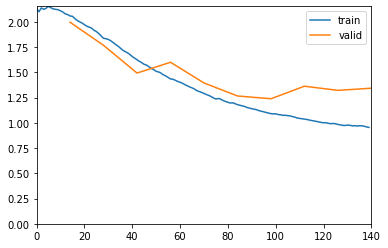

epoch,train_loss,valid_loss,accuracy,time
0,2.025429,2.066924,0.036585,00:00
1,1.842539,1.750192,0.523282,00:00
2,1.639903,1.455099,0.578714,00:00
3,1.455959,1.343626,0.609756,00:00
4,1.320749,1.227731,0.582040,00:00
5,1.215678,1.094316,0.583149,00:00
6,1.127939,1.161123,0.589800,00:00
7,1.062790,1.157336,0.616408,00:00
8,1.014276,1.123590,0.609756,00:00
9,0.974629,1.108265,0.606430,00:00


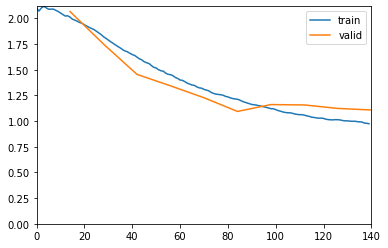

In [87]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=filepath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    #model.save('{}.model'.format(os.path.basename(filepath)))

In [88]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 1.1082650423049927: accuracy: 60.64%


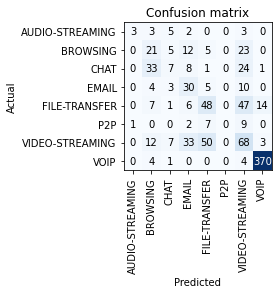

In [89]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [61]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-15s-Layer2.csv'
#raw_data = loadarff(filepath)
df_data = pd.read_csv(filepath)
# Converting arff file into pandas dataframe
#df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
#print(df_data['class1'].value_counts())
#column_name = list(df_data.columns)
#print(column_name)



relevant libraries uploaded


In [62]:
df_dep_var = 'class1'
cont_names = list(set(df_data.columns) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,1.953897,1.854137,0.559524,00:00
1,1.679746,1.376398,0.576190,00:00
2,1.392930,1.177823,0.615476,00:00
3,1.192819,1.057738,0.620238,00:00
4,1.057976,1.021700,0.677976,00:00
5,0.964946,0.983048,0.682143,00:00
6,0.903270,1.055342,0.652976,00:00
7,0.862857,1.013471,0.658333,00:00
8,0.830401,1.011304,0.657143,00:00
9,0.815337,1.039100,0.655952,00:00


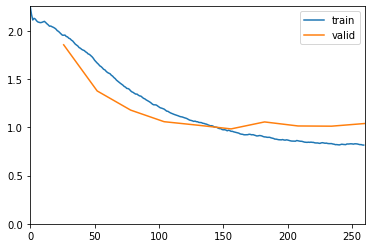

epoch,train_loss,valid_loss,accuracy,time
0,2.144884,1.997037,0.491667,00:00
1,1.805004,1.469010,0.581548,00:00
2,1.471476,1.186924,0.641071,00:00
3,1.217149,1.039949,0.699405,00:00
4,1.060966,0.963828,0.685119,00:00
5,0.974919,0.980273,0.697619,00:00
6,0.902058,0.995679,0.702381,00:00
7,0.846455,1.075797,0.698810,00:00
8,0.810809,1.044407,0.705357,00:00
9,0.786459,1.050831,0.700595,00:00


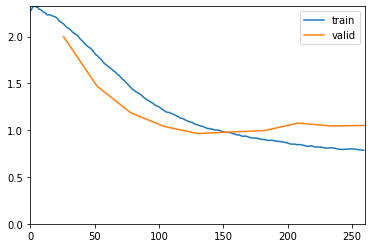

In [63]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=filepath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    #model.save('{}.model'.format(os.path.basename(filepath)))

In [64]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 1.0508307218551636: accuracy: 70.06%


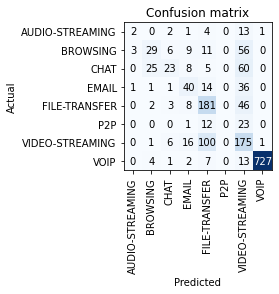

In [65]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [71]:
def loadData(csvFile):
    pickleDump = '{}.pickle'.format(csvFile)
    if os.path.exists(pickleDump):
        df = pd.read_pickle(pickleDump)
    else:
        df = pd.read_csv(csvFile, low_memory=False)
        # clean data
        # Note: there's a leading space for each column name except for the first one
        # let's strip the whitspaces from column names
        df = df.rename(str.strip, axis='columns')
        df.drop(columns=['Source IP', 'Destination IP'], inplace=True)
        # drop missing values/NaN etc.
        df.dropna(inplace=True)
        # drop Infinity rows and NaN string from each column
        for col in df.columns:
            indexNames = df[df[col]=='Infinity'].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
            indexNames = df[df[col]=='NaN'].index
            if not indexNames.empty:
                print('deleting {} rows with NaN in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
        
        # convert  Flow Bytes/s object & Flow Packets/s object into float type
        df['Flow Bytes/s'] = df['Flow Bytes/s'].astype('float64')
        df['Flow Packets/s'] = df['Flow Packets/s'].astype('float64')
        print(df.tail())
        df.to_pickle(pickleDump)
    
    return df

In [72]:
print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/TimeBasedFeatures-10s-Layer2.csv'
csvFile = os.path.join(filepath)


df_data = loadData(csvFile)
#df_data = pd.read_csv(filepath)



#raw_data = loadarff(filepath)
# Converting arff file into pandas dataframe
#df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
#print(df_data['class1'].value_counts())
#column_name = list(df_data.columns)
#print(column_name)



relevant libraries uploaded


/home/minglee/miniconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


      Source Port  Destination Port  Protocol  Flow Duration   Flow Bytes/s  \
8039          110             47257         6        7413083    2991.467922   
8040          110             47257         6        9807892     608.999365   
8041          110             47257         6        9979796     979.378737   
8042          110             47257         6           1327  818387.339864   
8043          110             47257         6        5169875    3670.494935   

      Flow Packets/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  Flow IAT Min  \
8039        8.633385  117667.984127  6.261953e+05       4956581            11   
8040        2.039174  516204.842105  1.971833e+06       8646908            45   
8041        3.306681  311868.625000  1.289556e+06       7341693             8   
8042     2260.738508     663.500000  5.861915e+02          1078           249   
8043       10.831983   93997.727273  3.816156e+05       2803964            16   

      ...  Bwd IAT Min  Active Mean  A

In [73]:
df_data.dtypes

Source Port           int64
Destination Port      int64
Protocol              int64
Flow Duration         int64
Flow Bytes/s        float64
Flow Packets/s      float64
Flow IAT Mean       float64
Flow IAT Std        float64
Flow IAT Max          int64
Flow IAT Min          int64
Fwd IAT Mean        float64
Fwd IAT Std         float64
Fwd IAT Max           int64
Fwd IAT Min           int64
Bwd IAT Mean        float64
Bwd IAT Std         float64
Bwd IAT Max           int64
Bwd IAT Min           int64
Active Mean           int64
Active Std            int64
Active Max            int64
Active Min            int64
Idle Mean             int64
Idle Std              int64
Idle Max              int64
Idle Min              int64
label                object
dtype: object

In [74]:
df_dep_var = 'label'
cat_names = ['Source Port', 'Destination Port', 'Protocol']
cont_names = list(set(df_data.columns) - set(cat_names) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,2.007170,1.843352,0.410492,00:00
1,1.605709,1.429935,0.523620,00:00
2,1.276583,1.199155,0.619592,00:00
3,1.109345,1.381411,0.488812,00:00
4,1.048100,1.114772,0.646942,00:00
5,0.992941,1.338817,0.404276,00:00
6,0.966293,1.248751,0.473148,00:00
7,0.939307,1.087973,0.653904,00:00
8,0.924800,1.150500,0.652909,00:00
9,0.909374,1.175580,0.539284,00:00


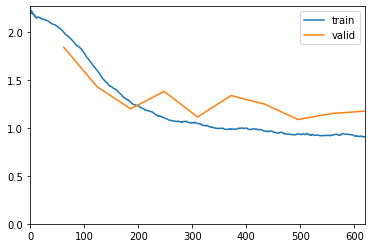

epoch,train_loss,valid_loss,accuracy,time
0,1.971713,1.715592,0.369717,00:00
1,1.601666,1.453042,0.503978,00:00
2,1.316442,1.257201,0.579562,00:00
3,1.145361,1.410174,0.450771,00:00
4,1.056779,1.738956,0.387867,00:00
5,1.006033,1.290723,0.383391,00:00
6,0.966403,1.327049,0.378916,00:00
7,0.957042,1.236889,0.474391,00:00
8,0.923218,1.388421,0.403033,00:00
9,0.907896,1.214675,0.517404,00:00


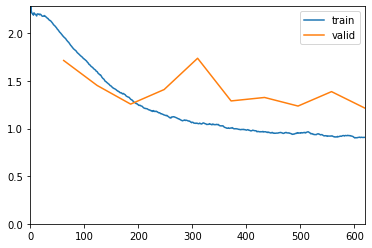

In [76]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=filepath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
    #model.save('{}.model'.format(os.path.basename(filepath)))

In [77]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 1.2146751880645752: accuracy: 51.74%


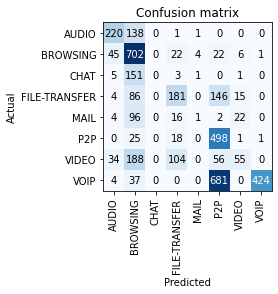

In [78]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()

In [93]:


print('relevant libraries uploaded')

# Choose your own filepath for arff file
filepath = 'CICDataSet-TOR/Scenario-B/merged_5s.csv'
csvFile = os.path.join(filepath)


df_data = loadData(csvFile)
#df_data = pd.read_csv(filepath)



#raw_data = loadarff(filepath)
# Converting arff file into pandas dataframe
#df_data = pd.DataFrame(raw_data[0])

# Now, you can perform pandas methods if it is easy enough for you
#print(df_data['class1'].value_counts())
#column_name = list(df_data.columns)
#print(column_name)




relevant libraries uploaded


In [96]:
df_data.dtypes

Source Port           int64
Destination Port      int64
Protocol              int64
Flow Duration         int64
Flow Bytes/s        float64
Flow Packets/s      float64
Flow IAT Mean       float64
Flow IAT Std        float64
Flow IAT Max          int64
Flow IAT Min          int64
Fwd IAT Mean        float64
Fwd IAT Std         float64
Fwd IAT Max           int64
Fwd IAT Min           int64
Bwd IAT Mean        float64
Bwd IAT Std         float64
Bwd IAT Max           int64
Bwd IAT Min           int64
Active Mean           int64
Active Std            int64
Active Max            int64
Active Min            int64
Idle Mean             int64
Idle Std              int64
Idle Max              int64
Idle Min              int64
label                object
dtype: object

In [97]:
df_dep_var = 'label'
cat_names = ['Source Port', 'Destination Port', 'Protocol']
cont_names = list(set(df_data.columns) - set(cat_names) - set([df_dep_var]))

epoch,train_loss,valid_loss,accuracy,time
0,nan,nan,0.070720,00:01
1,nan,nan,0.070720,00:01
2,nan,nan,0.070720,00:01
3,nan,nan,0.070720,00:01
4,nan,nan,0.070720,00:01
5,nan,nan,0.070720,00:01
6,nan,nan,0.070720,00:01
7,nan,nan,0.070720,00:01
8,nan,nan,0.070720,00:01
9,nan,nan,0.070720,00:01


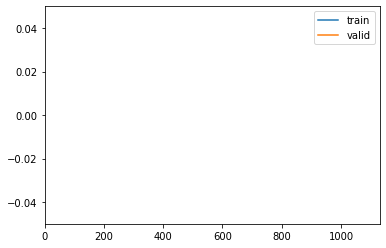

epoch,train_loss,valid_loss,accuracy,time
0,1.722368,nan,0.461952,00:01
1,1.210338,nan,0.642266,00:01
2,1.017050,nan,0.459884,00:01
3,0.928148,nan,0.628481,00:01
4,0.860745,nan,0.692997,00:01
5,0.800674,nan,0.590157,00:01
6,0.790336,nan,0.466088,00:01
7,0.755764,nan,0.648056,00:01
8,0.738197,nan,0.524538,00:01
9,0.734791,nan,0.570582,00:01


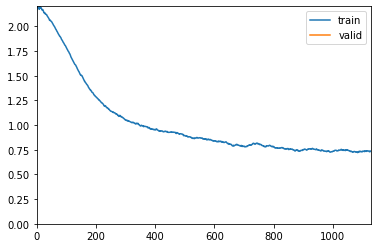

In [98]:
for train_idx, test_idx in sss.split(df_data.index, df_data[df_dep_var]):
    data_fold = (TabularList.from_df(df_data, path=filepath, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=df_dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[50, 20], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #
   # model.save('{}.model'.format(os.path.basename(filepath)))

In [99]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss nan: accuracy: 57.06%


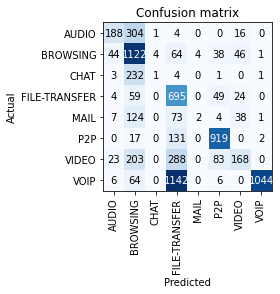

In [100]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix()